# Praca domowa nr 2
## Jakub Szypuła


In [28]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

In [29]:
dane = pd.read_csv('https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1')

In [30]:
dane.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


# Encoding

## Target encoding dla it_location

In [31]:
import category_encoders

te_miasto = dane.copy()
te = category_encoders.TargetEncoder()
te_miasto['it_location_enc'] = te.fit_transform(te_miasto['it_location'], te_miasto['price'])

te_miasto[['it_location', 'it_location_enc']].head()
#data_te.loc[1:3, ['item_id', 'it_location', 'it_location_encoded']]

,it_location,it_location_enc
0,Warszawa,85.423398
1,Warszawa,85.423398
2,Leszno,61.990914
3,Wola Krzysztoporska,35.433365
4,BIAŁYSTOK,117.191956


Dzięki one hot encodingu możemy zastąpić zmienną kategoryczną mieszanką zmiennej kategorycznej i oczekiwanej wartości w ramach jednej kolumny, kiedy one hot encoding wymaga większej liczby kolumn, co zwiększa rozmiar ramki danych.

## One-hot encoding dla main_category

In [32]:
te_ohe = dane.copy()
te = category_encoders.OneHotEncoder(use_cat_names = True)
tmp = pd.DataFrame(te.fit_transform(te_ohe[['main_category']]))
te_ohe = pd.concat([te_ohe[['main_category']], tmp], axis=1)
te_ohe.head()

,main_category,main_category_Komputery,"main_category_Odzież, Obuwie, Dodatki",main_category_Dom i Ogród,main_category_Książki i Komiksy,main_category_Biżuteria i Zegarki,main_category_RTV i AGD,main_category_Motoryzacja,main_category_Dla Dzieci,main_category_Uroda,...,main_category_Filmy,main_category_Fotografia,main_category_Biuro i Reklama,main_category_Instrumenty,main_category_Muzyka,main_category_Konsole i automaty,"main_category_Sprzęt estradowy, studyjny i DJ-ski",main_category_Antyki i Sztuka,main_category_Bilety,main_category_Nieruchomości
0,Komputery,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Odzież, Obuwie, Dodatki",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dom i Ogród,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Książki i Komiksy,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Odzież, Obuwie, Dodatki",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Jest to prosty, binarny sposób kodowania kategorii - jak 1 to jest, jak 0 to nie ma, chociaż nie jest to zbyt czytelne na pierwszy rzut oka i powstało 27 nowych kolumn.

## BaseN

In [33]:
te_bn=dane.copy()

bn = category_encoders.BaseNEncoder(base = 16)
tmp = bn.fit_transform(te_bn['main_category'])
te_bn = pd.concat([te_bn[['main_category']], tmp], axis=1)
te_bn.loc[te_bn['main_category_1'] > 0]

,main_category,main_category_0,main_category_1,main_category_2
112,Zdrowie,0,1,0
113,Zdrowie,0,1,0
133,Przemysł,0,1,1
151,Filmy,0,1,2
165,Filmy,0,1,2
...,...,...,...,...
419986,Muzyka,0,1,6
419987,Muzyka,0,1,6
419999,Muzyka,0,1,6
420013,Konsole i automaty,0,1,7


BaseN kategoryzuje dane w postaci liczb o podstawie N. Dla N=1 jest to one-hot encoding, dla N=2 jest to binary encoding. Pozwala do zredukować liczbę kolumn bez stosowania ordinal encoding.

## Ordinal Encoding

In [34]:
te_orde=dane.copy()

orde = category_encoders.OrdinalEncoder()
tmp = orde.fit_transform(te_orde['main_category'])
tmp = tmp.rename(columns={'main_category': 'main_category_enc'})
te_orde = pd.concat([te_orde[['main_category']], tmp], axis=1)
te_orde.loc[te_orde['main_category_enc'] > 10]

,main_category,main_category_enc
45,Sport i Turystyka,11
48,Delikatesy,12
49,Delikatesy,12
53,Kolekcje,13
59,Gry,14
...,...,...
419995,Sport i Turystyka,11
419999,Muzyka,22
420001,Kolekcje,13
420013,Konsole i automaty,23


W tym wypadku każda kategoria dostała swój własny numer.

# Uzupełnianie braków

Przygotowanie ramki wg treści:

In [35]:
dane2=dane.copy()
dane2=dane2[['price', 'it_seller_rating', 'it_quantity']]

## Zmienna it_seller_rating

In [36]:
RMSE_seller_rating=[]
imp = sklearn.impute.IterativeImputer(max_iter=10)

for i in range(10):
    tmp=dane2.copy()
    tmp.loc[tmp.sample(frac=0.1).index, 'it_seller_rating'] = None
    uzupelnione=pd.DataFrame(imp.fit_transform(tmp))
    RMSE_seller_rating.append(np.sqrt(mean_squared_error(dane2, uzupelnione)))
    

In [37]:
# Średnie RMSE:
round(np.mean(RMSE_seller_rating))

6706.0

In [38]:
# Odchylenie Standardowe RMSE:
round(np.std(RMSE_seller_rating))

73.0

Jak widać, odchylenie standardowe nie jest zbyt duże w porównaniu do średniego błędu, więc doświadczenie za każdym razem zwraca podobne wyniki. Błąd jest całkiem duży, więc uzupełnianie wartości w ten sposób nie jest zbyt dokładne.

## Zmienna it_seller_rating oraz it_quantity

In [41]:
RMSE_both=[]
imp = sklearn.impute.IterativeImputer(max_iter=10)

for i in range(10):
    tmp=dane2.copy()
    tmp.loc[tmp.sample(frac=0.1).index, 'it_seller_rating'] = None
    tmp.loc[tmp.sample(frac=0.1).index, 'it_quantity'] = None
    uzupelnione=pd.DataFrame(imp.fit_transform(tmp))
    RMSE_both.append(np.sqrt(mean_squared_error(dane2, uzupelnione)))
    

In [42]:
# Średnie RMSE:
round(np.mean(RMSE_both))

7914.0

In [43]:
# Odchylenie Standardowe RMSE:
round(np.std(RMSE_both))

62.0

Błąd jest tutaj znacznie większy, nie jest jednak dwa razy większy, a "tylko" o około 20%. Odchylenie standardowe jest porównywalne i całkiem niskie.

## Podsumowanie i wykres

Zastosowana przeze mnie metoda (Multivariate feature imputation) nie jest zbyt dokładna, ale uzupełnianie dla niej braków w więcej niż jednej kolumnie powoduje niewiele więcej błędów niż uzupełnianie braków w jednej kolumnie.

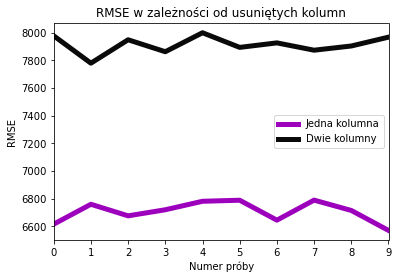

In [47]:
df = pd.DataFrame(list(zip(RMSE_seller_rating, RMSE_both)), 
               columns =['Jedna kolumna', 'Dwie kolumny'])

plot = df.plot.line(title="RMSE w zależności od usuniętych kolumn", color = ['#9d00bd', '#0a0a0a'], lw=5)
plot.set_xlabel("Numer próby")
plot.set_ylabel("RMSE")
plot